pySTREaM - STochastic Residential water End-use Model in Python

In [1]:
# imports
from demandsim.demandsim.generator import DemandGenerator, Appliances, Trajectories, Fixtures

# Example for generating a demand trajectory given by the househould
# size and the appliance configuration as parameter.

# From 1 to 5, it indicates the number of people living in the house. 6 means '>5'.
hhsize = 2  # This parameter should be in the interval (1,6).

# Water consuming fixtures selection
appliances = frozenset([
    Fixtures.StToilet,
    Fixtures.StShower,
    Fixtures.StFaucet,
    Fixtures.StClothesWasher,
    Fixtures.StDishwasher,
    Fixtures.StBathtub
])

# Time horizon length setting
horizon = 31*2  # It is measured in [days]

# Time sampling resolution
# It is measured in [10 seconds] units. The maximum resolution allowed is 10 seconds (ts = 1).
ts = 1

gen = DemandGenerator(horizon, ts)
trajectories = gen.generate_trajectories(appliances, hhsize)


In [2]:
from paths import *
import pandas as pd
results_py0 = pd.DataFrame(data=trajectories)
results_py = pd.DataFrame()
for ii, col in enumerate(results_py.columns):
    if col != 'TOTAL':
        results_py[col] = results_py0[col]
    else:
        results_py[col] = results_py0['Total']

results_py.to_csv(os.path.join(os.path.dirname(ROOT_DIR),  *['results', 'pySTREaM_ts_2M_2P.csv']))
print('File saved')

File saved


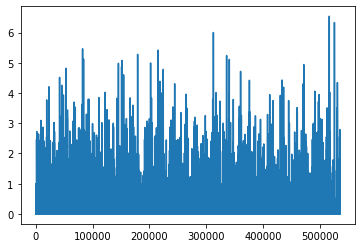

In [3]:
#plot
import matplotlib.pyplot as plt  # type: ignore
plt.plot(trajectories['Total'])
plt.show()